In [149]:
from google.colab import drive
import pandas as pd
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [150]:
drive_path = '/content/gdrive/My Drive/'
train = pd.read_csv('gdrive/My Drive/titanic/train.csv')
test = pd.read_csv('gdrive/My Drive/titanic/test.csv')
submission = pd.read_csv('gdrive/My Drive/titanic/submission.csv')
print(train.shape, test.shape, submission.shape)

(891, 12) (418, 11) (418, 2)


In [151]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [152]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [153]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [154]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [155]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


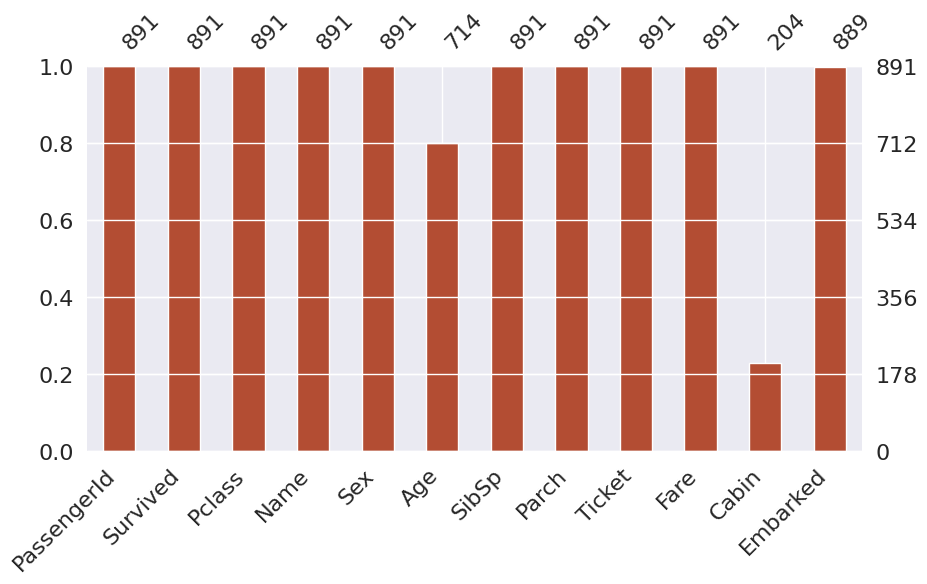

In [156]:
#결측값의 분포를 그래프로 확인: ,ㅐ내 ㅑㅔ
import missingno as msno
msno.bar(train, figsize=(10,5), color=(0.7,0.3,0.2))
plt.show()

<Axes: >

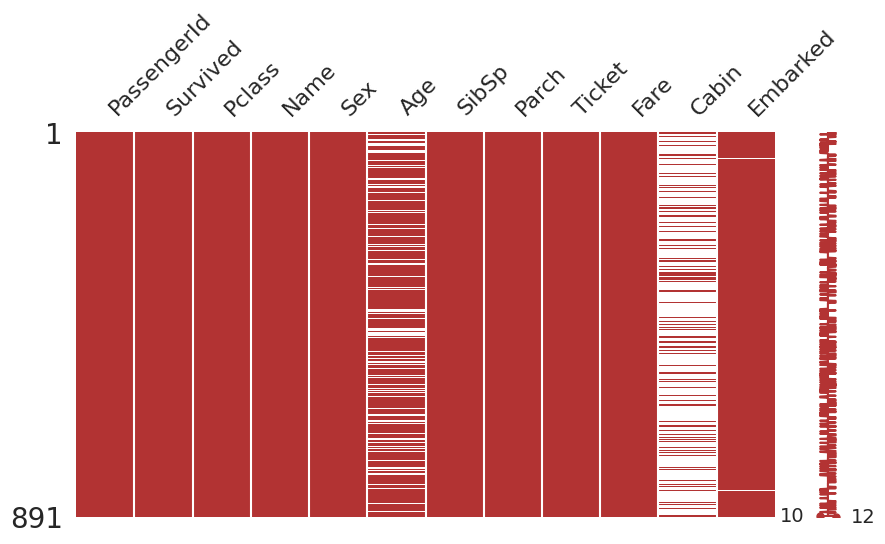

In [157]:
msno.matrix(train,figsize=(10,5), color=(0.7,0.2,0.2))

<ipython-input-158-38974b4034b9>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(),annot=True, cbar=True)


<Axes: >

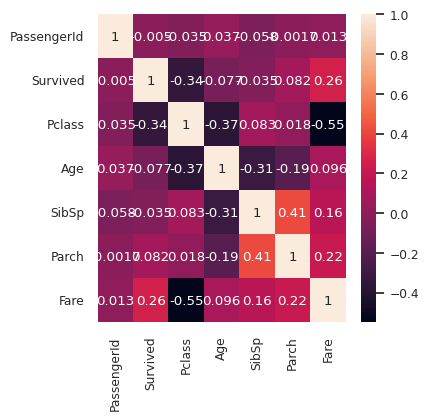

In [158]:
#상관계수 테이블 히트맵으로 시각화
plt.figure(figsize=(4,4))
sns.set(font_scale=0.8)
sns.heatmap(train.corr(),annot=True, cbar=True)

In [159]:
train['TrainSplit'] = 'Train'
test['TrainSplit'] = 'Test'

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TrainSplit
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Train
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Train
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Train
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Train
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Train


In [160]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TrainSplit
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Test
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Test
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Test
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Test
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Test


In [161]:
data = pd.concat([train,test],axis=0)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TrainSplit
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Train
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Train
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Test
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Test
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Test
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Test


In [162]:
#숫자형 피처 추출
data_num = data.loc[:,	['Pclass',	'Age',	'SibSp',	'Parch'	,	'Fare','Survived']]
data_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Age       1046 non-null   float64
 2   SibSp     1309 non-null   int64  
 3   Parch     1309 non-null   int64  
 4   Fare      1308 non-null   float64
 5   Survived  891 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 71.6 KB


In [163]:
# 결측치 대체: 나이에 대한 결측치는 평균으로, 요금에 대한 결측치는 최빈값으로 대체
data_num["Age"] = data_num['Age'].fillna(data_num['Age'].mean())
data_num["Fare"] = data_num['Fare'].fillna(data_num['Fare'].mode()[0])
# data_num['Age'].fillna(data_num['Age'].mean(), inplace=True)
# data_num['Fare'].fillna(data_num['Fare'].mode()[0], inplace=True)
# data_num['Fare'].mode()  ==> 0    8.05 그래서 인덱스 [0]을 줘야 8.05가 나오는 거임

In [164]:
#목표변수(Target-Survived) 를 제외한 설명변수들을 정한다
selected_features = ['Pclass',	'Age',	'SibSp',	'Parch'	,	'Fare']

In [165]:
#훈련데이터의 문제와 답
X_train = data_num.loc[data['TrainSplit']=='Train',selected_features]
y_train = data_num.loc[data['TrainSplit']=='Train',"Survived"]

#테스트데이터의 문제
X_test = data_num.loc[data['TrainSplit']=='Test',selected_features]

In [166]:
X_train.shape, y_train.shape, X_test.shape

((891, 5), (891,), (418, 5))

<Axes: >

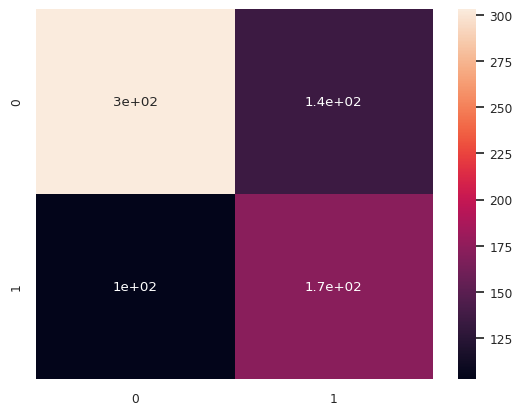

In [167]:
# 로지스틱 회귀 모델을 이용해 학습시켜 보자
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, train_size = 0.2, shuffle=True, random_state = 1234)

#공부방법을 정해주자
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=5, random_state=20)

model.fit(X_tr, y_tr)
y_val_pred = model.predict(X_val)

#혼동행렬 Confusion Matrix를 출력해보자
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_val,y_val_pred), annot=True)

In [168]:
#성능 평가 지표 출력하기
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("정확도:",accuracy_score(y_val, y_val_pred))
print("정밀도:",precision_score(y_val, y_val_pred))
print("재현율:",recall_score(y_val, y_val_pred))
print("f1score:",f1_score(y_val, y_val_pred))

정확도: 0.6661991584852734
정밀도: 0.5602605863192183
재현율: 0.6254545454545455
f1score: 0.5910652920962199


In [169]:
y_test_pred = model.predict(X_test)
submission['Survived'] = y_test_pred.astype(int)

submission.to_csv('gdrive/My Drive/titanic/submission_j.csv', index=False)
print('파일을저장햇습니다')

파일을저장햇습니다
